# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# google Drive Location

In [2]:
! ls '/gdrive/My Drive/Colab Notebooks'

1-2562-DIP			   function-menu.ipynb	    test.ipynb
1-2562-Selected-topics		   grade-list.ipynb	    try-except.ipynb
bmi.ipynb			   if-else-condition.ipynb  tutorial-01.ipynb
face-detection-haar-cascade.ipynb  image		    Untitled0.ipynb
face-exp			   list-append.ipynb	    work_prem
for-loop.ipynb			   list-for-loop.ipynb
function.ipynb			   shopping-list.ipynb


In [3]:
! ls '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'

dog-01.jpg  image-room.jpg  license-plate.jpg


# Read Image

## OpenCV

In [0]:
import cv2

In [0]:
gdrive_location = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_location = gdrive_location + 'dog-01.jpg'

### ใช้ OpenCV โหลดรูปภาพแบบ ภาพสี (Color Image)

In [0]:
# Load an color image
img_color = cv2.imread(img_location, 1)

### ใช้ OpenCV โหลดรูปภาพแบบ ภาพสีเทา (Gray Image)

In [0]:
# Load an color image in grayscale
img_gray = cv2.imread(img_location, 0)

### ใน google colab ไม่สามารถใช้ OpenCV แสดงผลรูปภาพได้

In [8]:
cv2.imshow('image', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

## การแสดงข้อมูลด้วย matplotlib
ผลลัพธ์ที่ได้จะแสดงรูปภาพเป็นสีน้ำเงิน

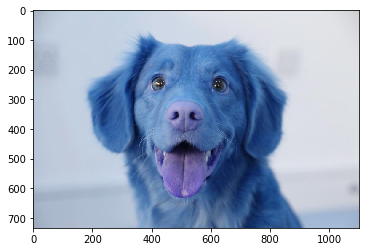

In [9]:
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.imshow(img_color)
plt.show()

### แสดงรูปภาพแบบ RBG ด้วย matplotlib

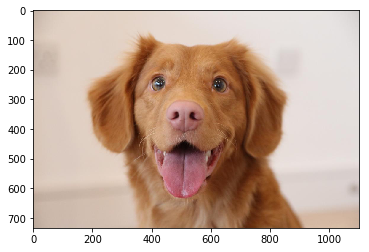

In [10]:
import matplotlib.image as mpimg

image = mpimg.imread(img_location)
plt.imshow(image)
plt.show()

### ไม่แสดงค่าในแกน (axis) x และ y

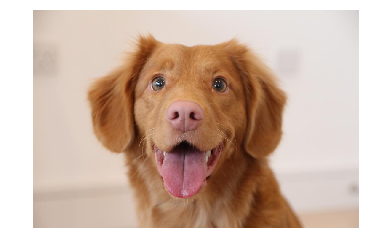

In [11]:
plt.axis('off')
plt.imshow(image)
plt.show()

### แสดงรูปภาพแบบ Gray ด้วย matplotlib

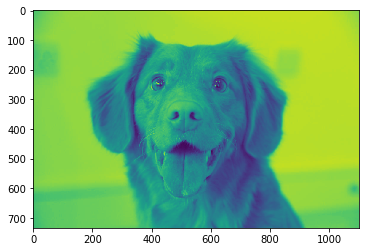

In [12]:
plt.imshow(img_gray)
plt.show()

เพิ่มคำสั่ง plt.gray() เพื่อให้แสดงสีเทาที่ถูกต้อง

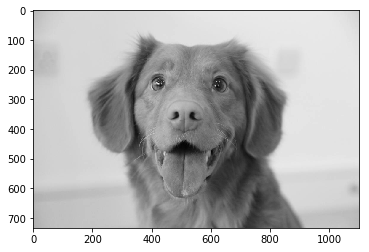

In [13]:
plt.gray()
plt.imshow(img_gray)
plt.show()

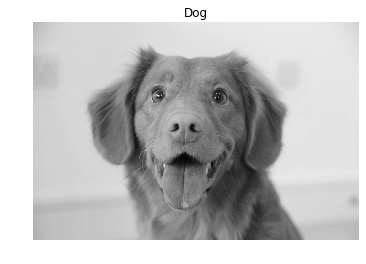

In [14]:
plt.title('Dog')
plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.show()

## Scikit-image

In [0]:
from skimage import io

### ใช้ Scikit-image โหลดรูปภาพ

In [0]:
# โหลดรูปภาพเป็นภาพสี (Color Image)
img = io.imread(img_location, 0)

### ใช้ Scikit-image แสดงรูปภาพ

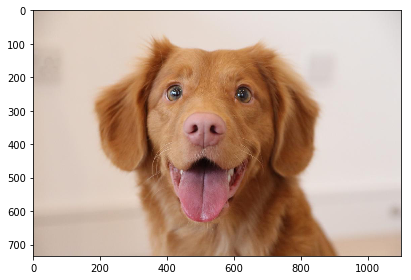

In [17]:
io.imshow(img)
io.show()

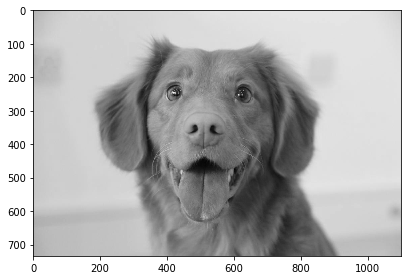

In [18]:
# โหลดรูปภาพเป็นสีเทา (Gray Image)
img_gray = io.imread(img_location, 1)

io.imshow(img_gray)
io.show()

## ขนาดของรูปภาพ (Image Resolution)

In [19]:
print(img.shape)
print(img_gray.shape)

(734, 1100, 3)
(734, 1100)


## ประเภทของข้อมูล (Data Type)

In [20]:
print(type(img))
print(img.dtype)

print(type(img_gray))
print(img_gray.dtype)

<class 'imageio.core.util.Array'>
uint8
<class 'numpy.ndarray'>
float64


## ชนิดของข้อมูล

In [21]:
print(img.dtype)
print(img_gray.dtype)

uint8
float64


# การแปลงรูปภาพสี (Color Image) เป็นรูปสีเทา (Gray Image)

# lightness method
Grayscale = (max(R, G, B) + min(R, G, B)) / 2

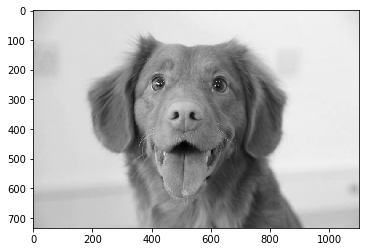

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_color = mpimg.imread(img_location)

gray_img = np.zeros((image_color.shape[0], image_color.shape[1]))

#print((int(np.amax(image_color[1][1])) + int(np.amin(image_color[1][1])))/2)


for i in range(0, image_color.shape[0]):
  for j in range(0, image_color.shape[1]):
    gray_img[i][j] = (int(np.amax(image_color[i][j])) + int(np.amin(image_color[i][j])))/2
    

plt.imshow(gray_img)
plt.show()    

# average method

Grayscale = (R + G + B / 3)

- https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/

In [0]:
import numpy as np

def rgb2gray_avg(rgb):
  
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = (r + g + b) / 3
  
  return gray

float64


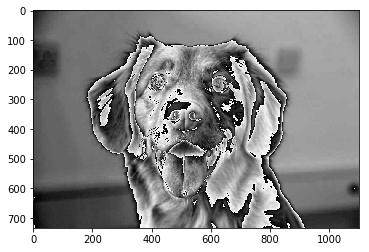

[[ 4  5  6 ... 34 34 34]
 [ 4  5  6 ... 34 34 34]
 [ 5  5  6 ... 34 34 34]
 ...
 [ 6  7  8 ... 36 36 36]
 [ 6  7  8 ... 36 36 36]
 [ 6  7  8 ... 36 36 36]]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_color = mpimg.imread(img_location)
gray_img = rgb2gray_avg(image_color)

print(gray_img.dtype)
gray_img = gray_img.astype('int8') 
#print(gray_img.dtype)

plt.imshow(gray_img)
plt.show()

print(gray_img[0:10])


#  luminosity method
Grayscale = 0.2989 R + 0.5870 G + 0.1140 B

In [0]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

float64


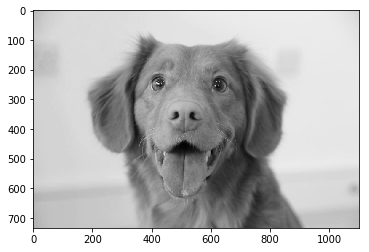

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_color = mpimg.imread(img_location)
gray_img = rgb2gray(image_color)

print(gray_img.dtype)

plt.imshow(gray_img)
plt.show()

In [0]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.21 * r + 0.72 * g + 0.07 * b

    return gray

float64


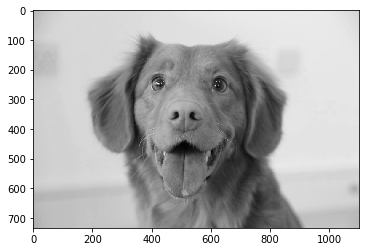

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_color = mpimg.imread(img_location)
gray_img = rgb2gray(image_color)

print(gray_img.dtype)

plt.imshow(gray_img)
plt.show()

In [33]:
# ขนาดของข้อมูล
print(gray_img.shape)

(734, 1100)


## การแปลงภาพสีเทา (Gray Image) เป็นภาพสีขาวดำ (Black and White Image)

วิธีการที่ง่ายที่สุดของการแปลงภาพให้เป็นสีดำคือการกำหนดค่าเทรดโชลด์ (Threshold: T) โดยค่า Threshold ที่สามารถกำหนดได้อยู่ในช่วง 0-255

In [34]:
print(type(gray_img))
print('maximum threshold value of gray image', np.amax(gray_img))

<class 'numpy.ndarray'>
maximum threshold value of gray image 249.54


จากตัวอย่างด้านบน ค่า Threshold สูงสุดที่กำหนดได้คือ 249

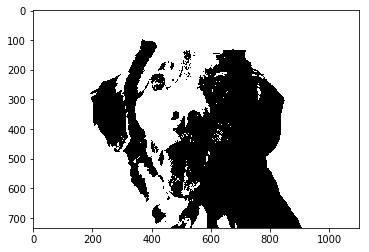

In [36]:
thresh = 125
bw_img = gray_img > thresh

plt.imshow(bw_img)
plt.show()

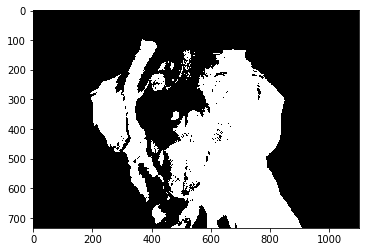

In [37]:
thresh = 125
bw_img = gray_img < thresh

plt.imshow(bw_img)
plt.show()

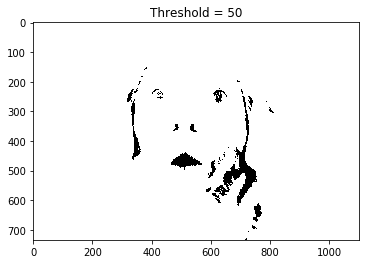

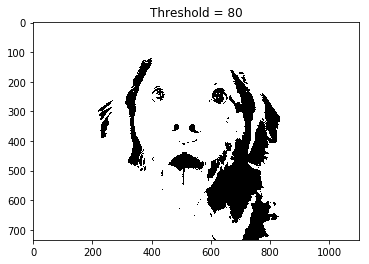

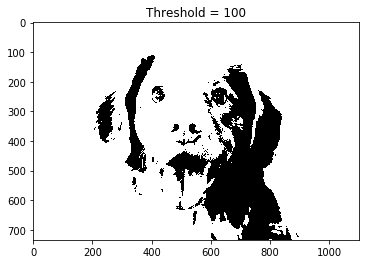

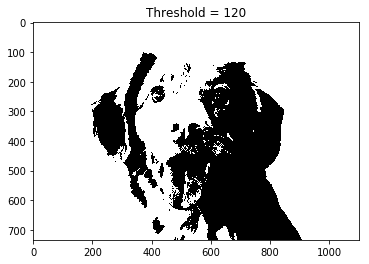

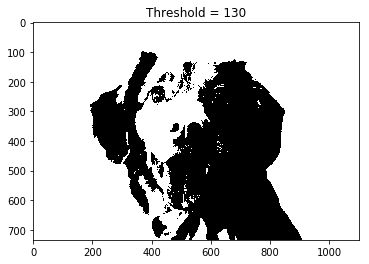

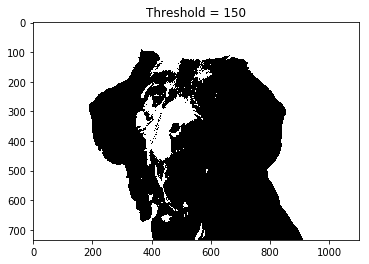

In [38]:
Threshold = [50, 80, 100, 120, 130, 150]
for thresh in Threshold:
  bw_img = gray_img > thresh
  title_img = 'Threshold = ' + str(thresh)
  plt.title(title_img)
  plt.imshow(bw_img)
  plt.show()

# Otsu algorithm
Global threshold

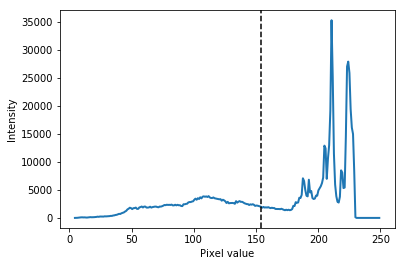

In [39]:
import matplotlib.pyplot as plt
from skimage import filters
from skimage import exposure

val = filters.threshold_otsu(gray_img)
hist, bins_center = exposure.histogram(gray_img)

plt.xlabel('Pixel value')
plt.ylabel('Intensity')
#plt.hist(gray_img.ravel(), bins=256)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')
plt.show()

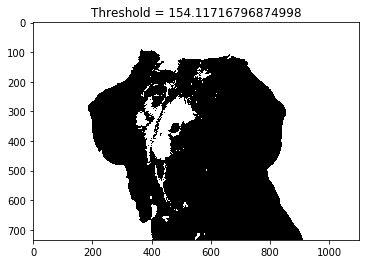

In [40]:
bw_img = gray_img > val
title_img = 'Threshold = ' + str(val)
plt.title(title_img)
plt.imshow(bw_img)
plt.show()

## Adaptive (Local) Threshold

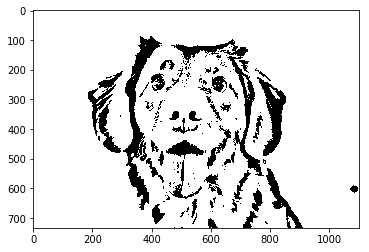

In [41]:
from skimage.filters import threshold_local

block_size = 121
local_thresh = threshold_local(gray_img, block_size, offset=10)
binary_local = gray_img > local_thresh


plt.imshow(binary_local)
plt.show()